In [1]:
import nbsetup
import scipy as sp
import ensemblepy as ep
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
ENSEMBLES = 12
POINTS = 1000
TRIALS = 1
STEPS = 10

In [73]:
def increasing_uniforms(normalise=None, adjustments=np.linspace(0.01,1,STEPS), points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        #nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            single = np.ones(points)*0
            spread = np.random.uniform(0, a, points)
            e = ep.Continuous([single, spread], normalise=normalise)
            collection[a].append(e)
    return collection

In [74]:
def increasing_points(base=0.2, adjustments=ep.binint(5,500,STEPS), trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = []#np.random.normal(5+base, 2*base, a)]
            for i in range(20):
                obs.append(np.random.normal(1, base, a))
            #obs = [np.random.normal(5, base, a), np.random.normal(5, 3*base, a)]
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [75]:
def increasing_ensembles(base=0.05, adjustments=ep.binint(1,10), points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = []
            for i in range(a):
                obs.append(np.random.normal(5, 2*base, points))
                obs.append(np.random.normal(5+base, 2*base, points))
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [76]:
def increasing_means(base=0.01, adjustments=np.linspace(0,1.0,STEPS), ensembles=ENSEMBLES, points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = [np.random.normal(1+a, base, points)]
            for i in range(ensembles):
                obs.append(np.random.normal(1, base, points))
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [77]:
def increasing_std(base=0.1, adjustments=np.linspace(0, 1.0, STEPS), ensembles=ENSEMBLES, points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = [np.random.normal(1, base+a, points)]
            for i in range(ensembles):
                obs.append(np.random.normal(1, base, points))
            collection[a].append(ep.Continuous(obs))
        
    return collection

In [38]:
FLATS_DATA = {
    'increasing_points': increasing_points(),
    'increasing_ensembles': increasing_ensembles(),
    'increasing_uniforms': increasing_uniforms(),
}

10


In [99]:
PROGS_DATA = {
    'increasing_means': increasing_means(),
    'increasing_std': increasing_std(),
    'overlapping_uniforms': increasing_outlier()
}

9


In [100]:
def plot(SETUP, DATA):
    f, ax = plt.subplots(3, 2, figsize=(9,11), gridspec_kw={'width_ratios': [3, 1]})
    plt.tight_layout(h_pad=2.2)
    
    for i, (func, xlabel) in enumerate(SETUP):
        data = []
        for adjustment, experiments in DATA[func].items():
            for j, ens in enumerate(experiments):
                d = {'adjustment': adjustment, 'trial': str(j)}
                d.update(ens.comparison())
                data.append(d)
        df = pd.DataFrame(data)
        df['i2'] = df['incoherence']**2
        means = df.groupby('adjustment').mean()
        
        
        measures = [
            ('incoherence', "Incoherence", "purple", "solid"),
            #('i2', "Incoherence squared", "purple", "dashed"),
            ('jsd', 'Jensen-Shannon Divergence', "red", "dashed"),
            ('std(means)', "Standard deviation of means", 'skyblue', 'dashed'),
            ('std(stds)', "Std dev of the std devs", 'darkblue', 'dotted'),
            ('ANOVA p', "ANOVA p-value", 'seagreen', 'dashed'),
            ('Kruskal p', "Kruskal p-value", 'orange', 'dotted'),
        ]
        
        for j, (val, label, color, style) in enumerate(measures):
            g = sns.lineplot(data=means, x='adjustment', y=val, label=label, color=color, linestyle=style, ax=ax[i][0], legend=i==0)
            g.set(ylim=(-0.005, 1.005), ylabel=None, xlabel=xlabel)
        
        if i==0:
            g.legend(ncol=2)
        
        h = sns.lineplot(data=means, x='adjustment', y='ANOVA', label='ANOVA', ax=ax[i][1], legend=i==0, linestyle='dashed', color='darkgreen')
        sns.lineplot(data=means, x='adjustment', y='Kruskal', label='Kruskal', ax=ax[i][1], legend=i==0, linestyle='dotted', color='orange')
        h.set(xlabel=None, ylabel=None)
        
    return f

In [134]:
def increasing_outlier(base=0.1, adjustments=range(2, STEPS), ensembles=ENSEMBLES, points=POINTS, trials=TRIALS):
    collection = {}
    for a in adjustments:
        nbsetup.cp(a)
        collection[a] = []
        for t in range(trials):
            obs = [np.random.uniform(0,1,points)]
            for _ in range(a*5):
                obs.append(np.random.uniform(0.25,0.75, points))
            collection[a].append(ep.Continuous(obs))
        
    return collection

9


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


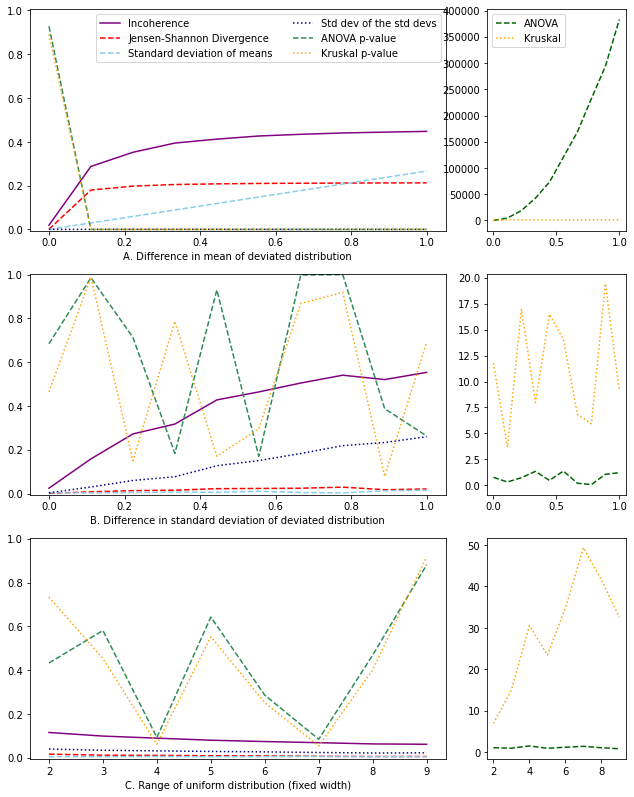

In [135]:
PROGS_DATA['overlapping_uniforms'] = increasing_outlier()
PROGS = [
    ('increasing_means', "A. Difference in mean of deviated distribution"),
    ('increasing_std', "B. Difference in standard deviation of deviated distribution"),
    ('overlapping_uniforms', "C. Range of uniform distribution (fixed width)"),
]
plot(PROGS, PROGS_DATA).savefig('cont-progs.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


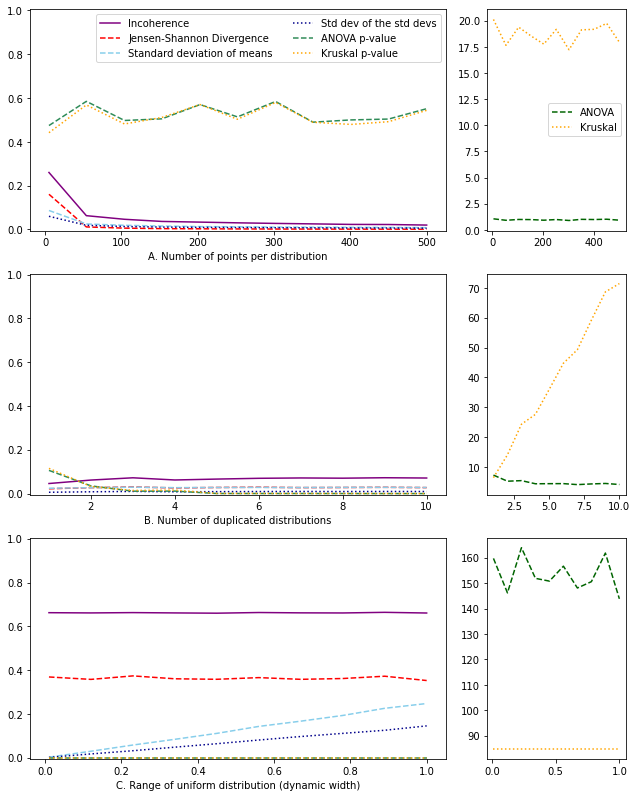

In [65]:
FLATS = [
    ('increasing_points', "A. Number of points per distribution"),
    ('increasing_ensembles', "B. Number of duplicated distributions"),
    ('increasing_uniforms', "C. Range of uniform distribution (dynamic width)"),
]
plot(FLATS, FLATS_DATA).savefig('cont-flat.eps')